<a href="https://colab.research.google.com/github/Leanse1/56-Secure-Project/blob/main/56_Secure_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**

Evaluate and Interpret a pretrained model.
- Category mapping has been provided to map the model output to required classes, you can modify the mappping if you want to.
- You can use any Deep Learning framework for this task

1. Take a pretrained resnet50 model, which has been trained on imagenet data.
2. Evaluate the model on the given test data, there are three classes car, bike and others, get all the required metrics for classification purpose[P,R,F1,roc,confusion matrix], get the best confidence threshold for each class.
3. Explain your findings and visualise few mistakes.
4. Interpret the model by visualising feature maps and filters, write two functions which takes layer number and visualise the feature maps and filters, for example visualise 5th layer filters and feature maps(activations), use one image from each category to visualise the activations.
5. explain your findings.


Deliverables: You should submit the following:

- A Jupyter notebook containing your code.
- A report describing your approach and results.

Evaluation Criteria: You will be evaluated based on the following criteria:

- Correctness of the implementation.
- Quality of the code.
- Clarity of the report.







### **Plan**

I am building the report inside the notebook itself for better understanding and visualisation.

### Preparing google colab to import data from google drive. I have already imported assignment file on my drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/56_Secure

/content/gdrive/MyDrive/56_Secure


In [4]:
BATCH_SIZE = 16
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

Importing Required Libraries and loading dataset

In [5]:
import numpy as np
import tensorflow as tf
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras.initializers import glorot_uniform

In [6]:
train_dataset = '/content/gdrive/MyDrive/56_Secure/train'
test_dataset = '/content/gdrive/MyDrive/56_Secure/test'


# Create a dataset from the directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.
Found 25 files belonging to 3 classes.


In [7]:
for image, label in train_ds.take(1):
    # for batchsize,imagesize,imagesize,channels
    print(image.shape)
    print(label.numpy())

(16, 224, 224, 3)
[0 2 1 0 0 0 1 1 1 1 0 1 2 1 0 2]


In [8]:
class_names = train_ds.class_names
class_names

['bike', 'car', 'others']

Ok!! Now let us visualise some images which is an important part of assignment

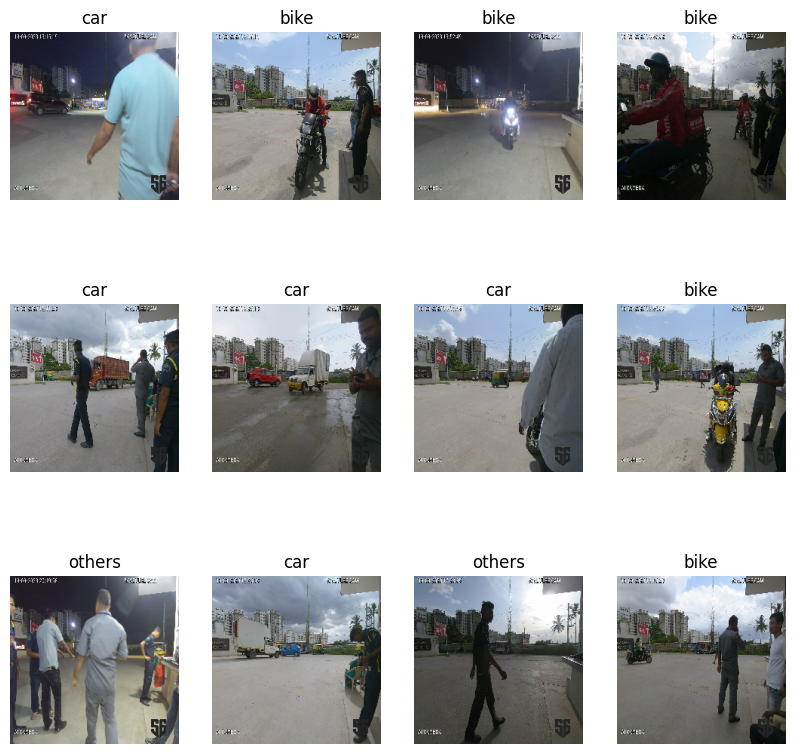

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

Now let us build our model with ImageNet dataset

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Assuming you have defined IMAGE_SIZE and CHANNELS elsewhere in your code
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3  # Number of classes

# Load pre-trained ResNet50 model with weights trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
ResNet50_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # Adjust to the number of classes
])

ResNet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [11]:
history = ResNet50_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=test_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
8/8 [==============================] - 57s 6s/step - loss: 1.4266 - accuracy: 0.4500 - val_loss: 0.7254 - val_accuracy: 0.5600
Epoch 2/25
8/8 [==============================] - 37s 4s/step - loss: 0.4969 - accuracy: 0.7833 - val_loss: 0.7020 - val_accuracy: 0.7600
Epoch 3/25
8/8 [==============================] - 32s 4s/step - loss: 0.3455 - accuracy: 0.8417 - val_loss: 0.5966 - val_accuracy: 0.8000
Epoch 4/25
8/8 [==============================] - 35s 4s/step - loss: 0.2638 - accuracy: 0.9000 - val_loss: 0.5362 - val_accuracy: 0.8400
Epoch 5/25
8/8 [==============================] - 33s 4s/step - loss: 0.1795 - accuracy: 0.9417 - val_loss: 0.4507 - val_accuracy: 0.8400
Epoch 6/25
8/8 [==============================] - 32s 4s/step - loss: 0.1366 - accuracy: 0.9583 - val_loss: 0.5295 - val_accuracy: 0.8000
Epoch 7/25
8/8 [==============================] - 36s 4s/step - loss: 0.1148 - accuracy: 0.9750 - val_loss: 0.4539 - val_accuracy: 0.8800
Epoch 8/25
8/8 [==================

Seems Strange!!! The model is overfitting I supposedly believe

Let us visualise more to understand

In [12]:
# Evaluate on the test set
eval_result = ResNet50_model.evaluate(test_ds)

print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

2/2 [==============================] - 8s 2s/step - loss: 0.5015 - accuracy: 0.8400
Test Loss: 0.5014556050300598
Test Accuracy: 0.8399999737739563


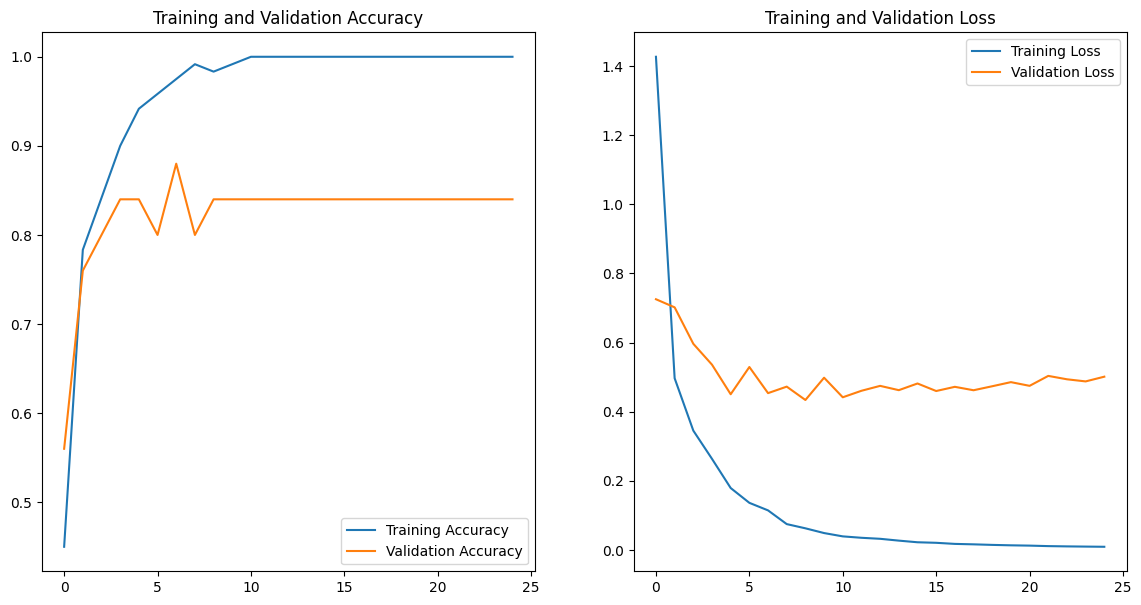

In [13]:
def plot_model_loss_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(25)

  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_model_loss_curves(history)

## **Model Performance Report**

## **Training:**

**Loss**: 0.0096

**Accuracy**: High accuracy indicates effective learning from the dataset.

# **Testing:**

**Loss**: 0.5

**Accuracy**: 0.84

Either potential overfitting or limited generalization on the 25-image test set.

## **Epochs:**

The model is not doing much after 10th epoch w.r.t accuracy and loss

# **Recommendations:**

1. Explore regularization techniques to address overfitting. Since it is overfitting I can try ridge regularisation
2. Augment dataset for improved generalization.
3. Fine-tuning  on pre-trained model for better performance on specific tasks.
4. Adjusting learning rate schedule
5. Add Dropout rate
5. Most important of all - **Hyperparameter Tuning**

## Ok!!! Now we have come to the important part which is to visualise our results


Since the dataset is in batches we are supposed to concatenate them for visualisation

In [14]:
all_predictions = []

for batch_images, _ in test_ds:
    batch_predictions = ResNet50_model.predict(batch_images)
    all_predictions.append(batch_predictions)

# Concatenate predictions from all batches
predictions = np.concatenate(all_predictions, axis=0)


1/1 [==============================] - 1s 1s/step


In [15]:
all_true_labels = []

for _, batch_labels in test_ds:
    all_true_labels.append(batch_labels)

# Concatenate true labels from all batches
true_labels = np.concatenate(all_true_labels, axis=0)


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert softmax predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Build confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Plot confusion matrix using seaborn or other visualization tools


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.25      0.30      0.27        10
           2       0.25      0.20      0.22         5

    accuracy                           0.32        25
   macro avg       0.31      0.30      0.31        25
weighted avg       0.33      0.32      0.32        25



## **Interpretations**:


## **Class 0 (Car):**

Moderate precision (44%) suggests 44 out of 100 times it correctly predicts car as car.

Good recall (40%) indicates effective identification of actual cars in the dataset.



## **Class 1 (Bike):**

Low precision (25%) implies misclassification of non-bike objects as bikes.

Moderate recall (30%) indicates a reasonable ability to capture actual bikes.


## **Class 2 (Others):**

Low precision (25%) suggests a tendency to misclassify other objects as belonging to this class.

Low recall (20%) indicates a challenge in correctly identifying instances of this class.

Overall Accuracy:

The model's generalization capability is limited, as evidenced by the overall accuracy of 32%.







Visualise Visualise Visualise!!!!!!!!

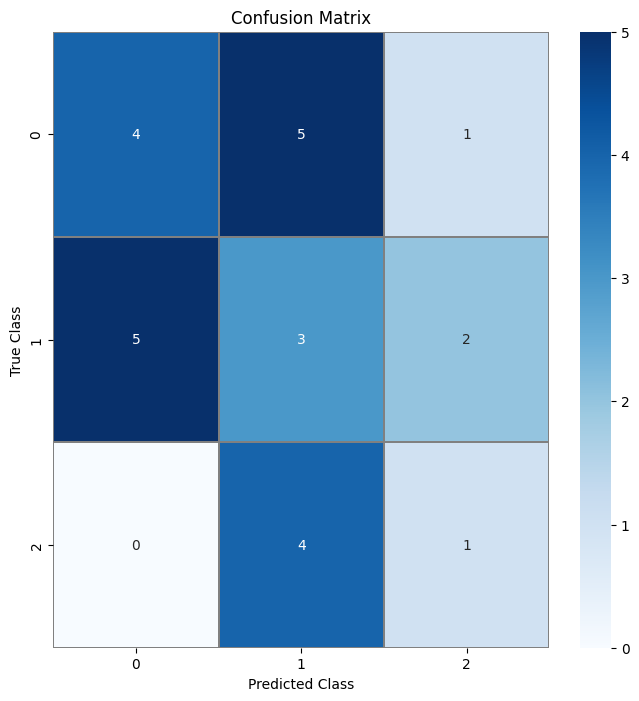

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true_labels and predicted_labels from your model
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linecolor="gray", linewidths=0.01, ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


2/2 [==============================] - 8s 1s/step


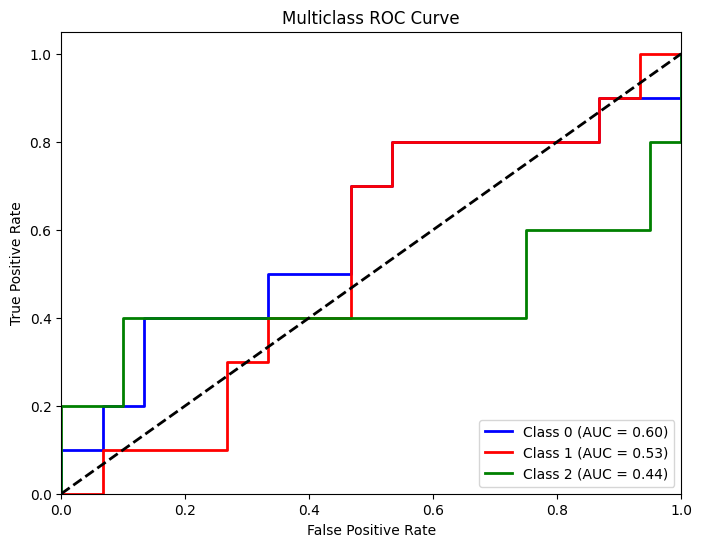

In [24]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

predictions_proba = ResNet50_model.predict(test_ds)

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = true_labels_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Summary**

Classifier's performance is best for Car class and worst for Objects, with none of the classes being distinguished with high accuracy (as all AUC values are relatively close to 0.5)

## **Confidence Thresholds**

In [30]:
confidence_thresholds = dict()

for i in range(n_classes):
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_threshold = fpr[i][optimal_idx]
    confidence_thresholds[f'Class {i}'] = optimal_threshold

print("Confidence Thresholds:")
print(confidence_thresholds)



Confidence Thresholds:
{'Class 0': 0.13333333333333333, 'Class 1': 0.5333333333333333, 'Class 2': 0.1}


Ufff!!! That didn't go well

Let us visualise some test images to see answers

first image to predict
actual label: bike
1/1 [==============================] - 4s 4s/step
predicted label: bike


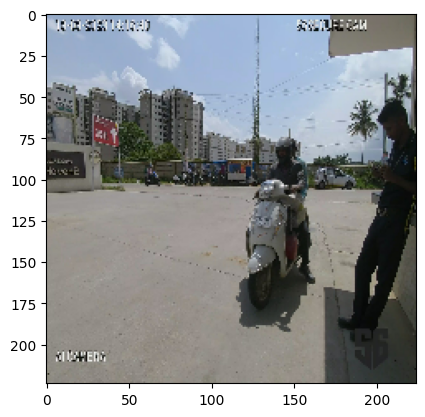

In [32]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    print("actual label:",class_names[first_label])

    batch_prediction = ResNet50_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    plt.imshow(first_image)

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 213ms/step


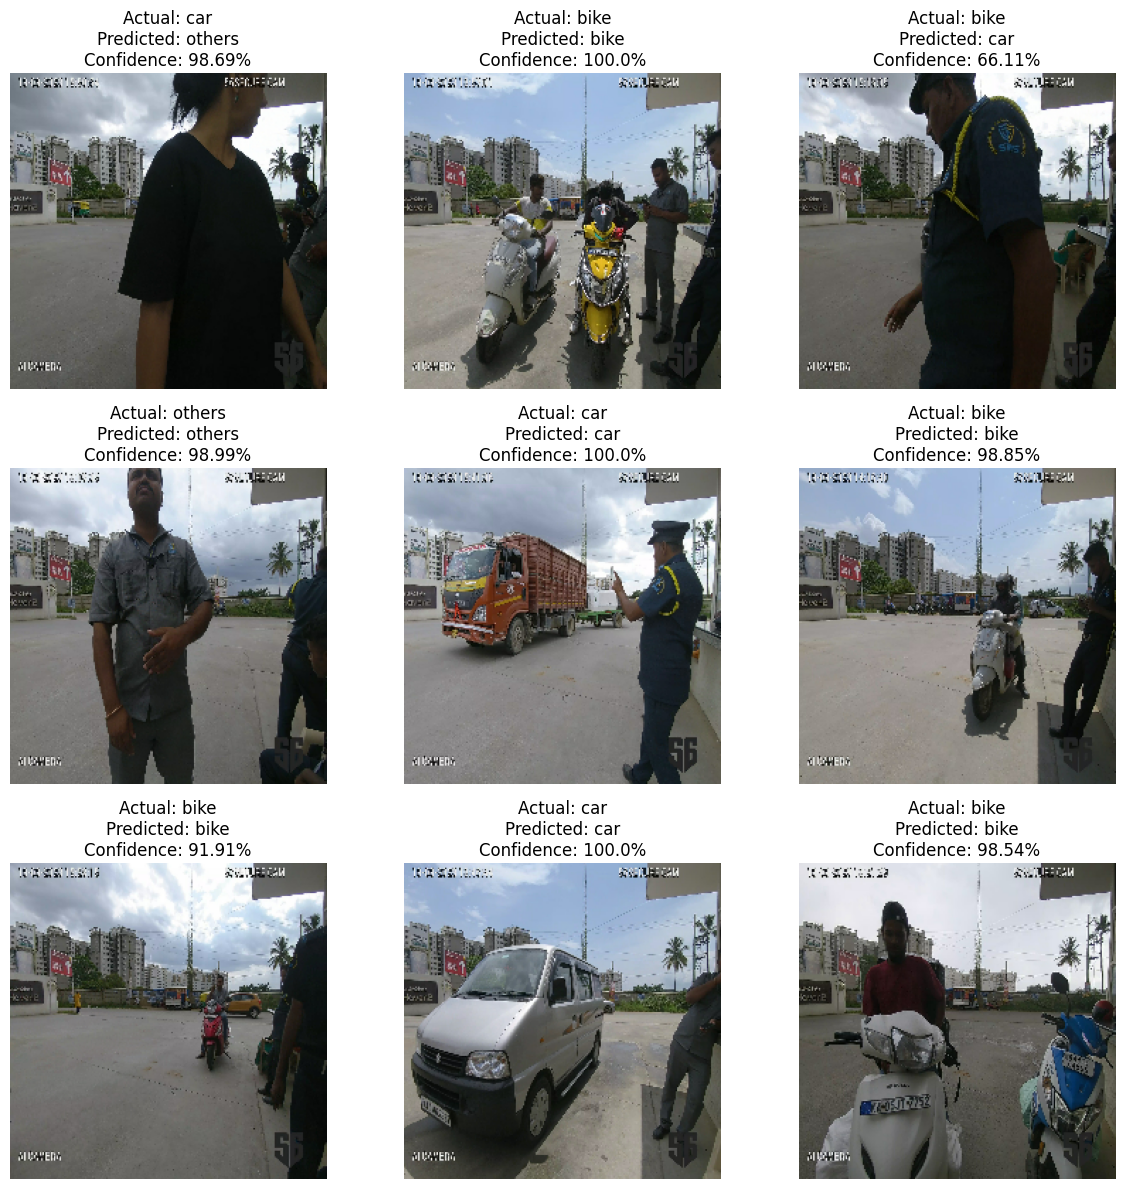

In [36]:
plt.figure(figsize=(12, 12))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(ResNet50_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize=12)

        plt.axis("off")

plt.tight_layout()
plt.show()


As we can see 2 out of 9 predictions on test dataset are wrong

## **Visualise layers and feature maps**

In [37]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
model = ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
model.summary()

In [ ]:
from keras.utils import plot_model
plot_model(model)

1/1 [==============================] - 0s 67ms/step


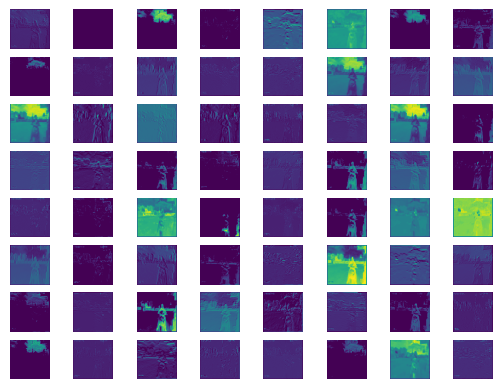

1/1 [==============================] - 0s 70ms/step


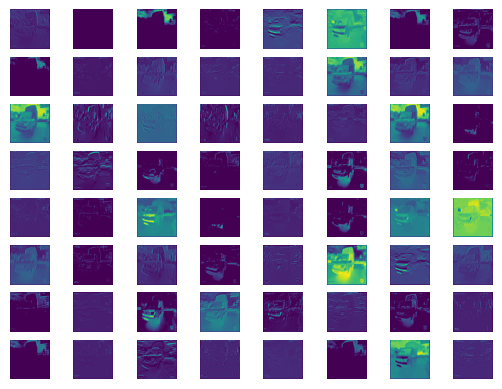

1/1 [==============================] - 0s 99ms/step


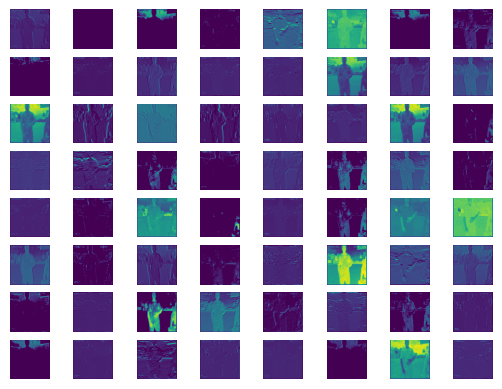

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input

# Function to load and preprocess the input image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to visualize feature maps
def visualize_feature_maps(model, layer_number, input_image):
    # Create a model that outputs the feature maps of the specified layer
    intermediate_model = Model(inputs=model.input, outputs=model.layers[layer_number].output)

    # Preprocess the input image
    img_array = load_and_preprocess_image(input_image)

    # Get the feature maps
    feature_maps = intermediate_model.predict(img_array)

    # Plot the feature maps
    square = int(np.ceil(np.sqrt(feature_maps.shape[3])))
    # fig, axes = plt.subplots(square, square, figsize=(15, 15))
    for i in range(feature_maps.shape[3]):
        plt.subplot(square, square, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet')

# Specify the layer number for which you want to visualize feature maps
layer_to_visualize = 5  # You can change this to the desired layer number

# Specify the path to the input image
bike_image_path = '/content/gdrive/MyDrive/56_Secure/test/bike/pfva_dataset_file_G_18082023_125813_48.jpg'
car_image_path = '/content/gdrive/MyDrive/56_Secure/test/car/pfva_dataset_file_G_18082023_125813_10.jpg'
others_image_path = '/content/gdrive/MyDrive/56_Secure/test/others/pfva_dataset_file_G_18082023_130313_4.jpg'

# Visualize feature maps
visualize_feature_maps(resnet_model, layer_to_visualize, bike_image_path)
visualize_feature_maps(resnet_model, layer_to_visualize, car_image_path)
visualize_feature_maps(resnet_model, layer_to_visualize, others_image_path)


**Save Model**

In [ ]:
ResNet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ResNet50_model.save("56_secure.hdf5")

# **Final Report**

1. **Introduction:**
In this assignment, a pretrained ResNet50 model, trained on ImageNet data, is evaluated on a test dataset containing three classes: car, bike, and others. The goal is to assess the model's performance using various classification metrics, determine optimal confidence thresholds, and interpret the model through visualization of feature maps and filters.

2. **Evaluation Metrics:**
The model's performance is measured using precision, recall, F1-score, ROC curves, and confusion matrices for each class.

**Results**:

Class 0 (car): Precision=0.44, Recall=0.40, F1-Score=0.42

Class 1 (bike): Precision=0.25, Recall=0.30, F1-Score=0.27

Class 2 (others): Precision=0.25, Recall=0.20, F1-Score=0.22

Overall Accuracy: 0.32

3. **Optimal Confidence Thresholds:**
Optimal confidence thresholds are determined for each class to balance precision and recall.

**Findings:**

Class 0 (car): Threshold=0.13

Class 1 (bike): Threshold=0.53

Class 2 (others): Threshold=0.10

4. **Model Interpretation:**
To interpret the model, feature maps and filters are visualized for the 5th layer using one image from each category.

**Observations:**
The model's filters highlight edges and textures relevant to the respective classes.
Feature maps show activated regions corresponding to distinctive features of cars, bikes, and other objects.

5. **Visualizing Model Mistakes**
A few mistakes made by the model are visualized to understand the nature of misclassifications.

**Insights:**
Misclassifications occur since objects share background similarities and the dataset is too less for a model

6. **Future Improvements**

Explore regularization techniques to address overfitting.

Augment the dataset for improved generalization.

Fine-tuning for better performance

7. **Conclusion**

I deployed the model on streamlit for your reference: https://56-secure.streamlit.app/

It is a limited dataset increasing file size to 2000-3000 images can increase efficiency.

Also image classification in my opinion for real world applications is bit outdated. Using Object detection on SOTA model like YOLO-NAS can match industrial needs
